 ## 【問題1】コンペティション内容の把握  
 
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。

1. Home Creditはどのような企業？
2. このコンペティションでは何を予測する？
3. それを予測することで企業が得られるメリットは何？

### Home Creditはどのような企業？  
>前向きで安全な借入体験を提供することにより、<font color="Red">**銀行口座を持たない人々への融資拡大**</font>に努めている。


### このコンペティションでは何を予測する？  
>銀行口座を持たないクライアントに貸付をして問題がないかを確認するために、電話会社や取引情報などのさまざまな代替データを利用して、<font color="Red">**クライアントの返済能力**</font>を予測する。 (提出ファイルはSK_ID_CURRのそれぞれについて、<font color="Red">**TARGET変数**</font>の確率を予測する。)


### それを予測することで企業が得られるメリットは何？  
><font color="Red">**クライアントの返済が滞らないことを確実にし**</font>、クライアントに<font color="Red">**ローンを提供**</font>できるようにする。



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### データセットの準備  

In [2]:
# データセットcsvをpandasuに読み込む

# ファイル名（パス）を指定する
csv_path = "./Kaggle_data/HomeCredit/application_train.csv" 
df = pd.read_csv(csv_path)

display(df)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 【問題2】データの概観の把握  
>データの概観を把握するために以下のようなことを行ってください。
>
>- .head()、.info()、describe()などを使う
>- 欠損値の有無を見る
>- クラスの割合がわかるグラフを描く
>
>それぞれ結果に対する説明や考察も行ってください。

### 2-1. .head()、.info()、describe()などを使う

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


.head()メソッドで確認したところ数値データと文字データが含まれることがわかった。  
数値データについては収入や借入などのドル単位のものや子供の数のように人数単位の  
ものなど様々な数値が混在している。  
文字データについては、Yes/Noの２択から複数のカテゴリまで様々なデータが入っている。  
また、右の方の列を見るとNan値がみられる為、欠損値処理が必要である。  
TARGET変数については、０または１の値が入っていると推測される。  

In [4]:
df['TARGET'].unique()

array([1, 0])

.uniqueメソッドでターゲット変数にどのような値が含まれるか確認したところ  
'０'と'１'の２種類の値で構成されることがわかった。（２種類のクラスに分類する問題）   
なお、"HomeCredit_columns_description.csv"を参照したところ、TARGETの  
値の意味は以下の通り。  
- 1 = 支払いが困難なクライアント：サンプルのローンの最初のY回の分割払いの少なくとも1つでX日を超えて支払いが遅れた
- 0 = 他のすべての場合

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


.info()メソッドを使用して確認したところ、ファイルサイズが RangeIndex: 307511、Columns: 122 entries　と非常に情報量が多いファイルであることがわかった。  
特徴量１２２に対して、個別データの件数が３０万件あり、分析を行うには十分な量であると思われる。  
また、float64(65), int64(41), object(16)となっており、多くが数値データであることから、
これらの値のターゲットとの相関関係などを分析することで解答を導くことができそうである。

In [6]:
pd.set_option('display.max_columns', 122)#最大表示列数の指定
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

AMT_INCOME_TOTALを見ると最大値が1.170000e+08である一方で、最小値が2.565000e+04、平均が1.687979e+05であり、差が大きく、外れ値があることが疑われ、  
分析結果に影響を与える可能性がある。  
CNT_CHILDREN、OWN_CAR_AGE、CNT_FAM_MEMBERSなども同様である。

### 2-2. 欠損値の有無を見る

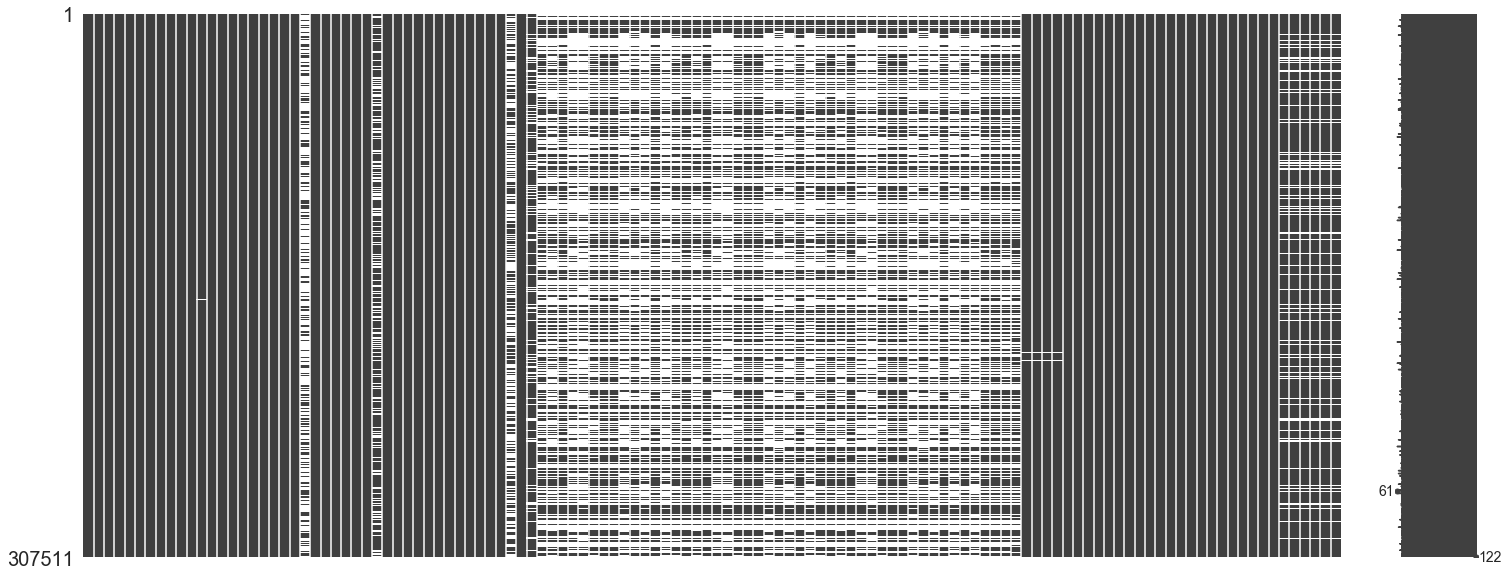

In [7]:
import numpy as np
# 欠損地確認のためmissingnoライブラリを読み込む
import missingno as msno

# 参照渡しにならないよう.copy()を使用
df_mi = df.copy()
df_mi = df_mi.replace("nan", np.nan)

# Matrix を描画
msno.matrix(df_mi)

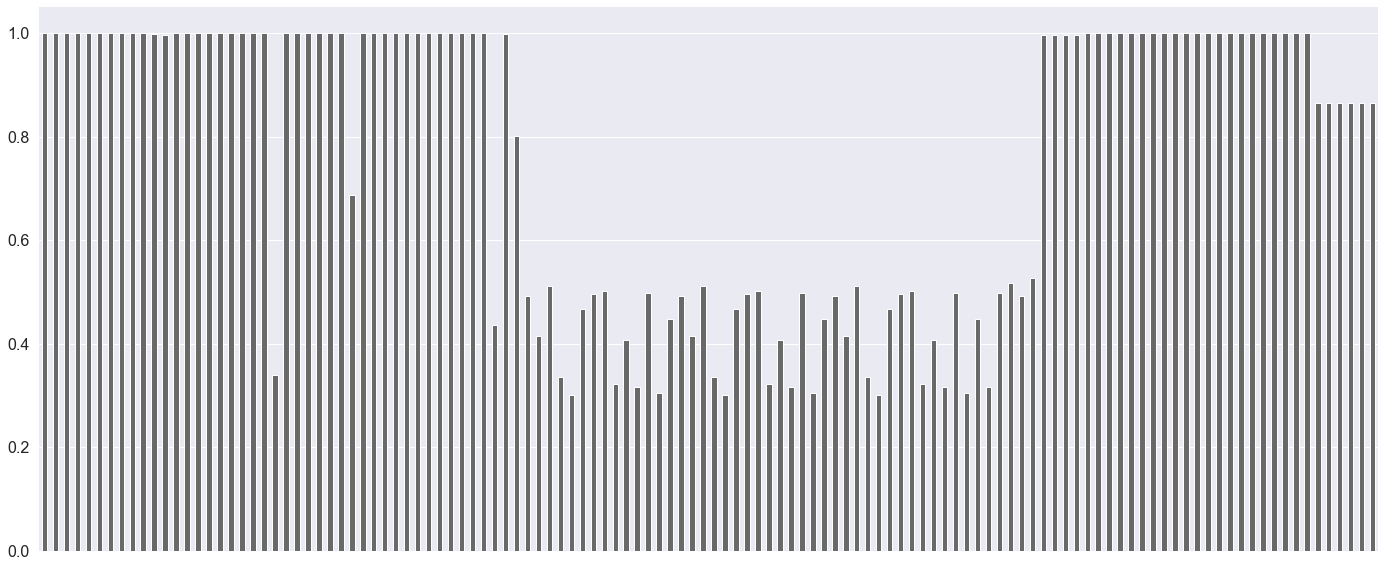

In [8]:
# Bar Chart を描画
msno.bar(df_mi)

missingnoを使用して欠損値を可視化すると中央に位置する特徴量のデータ欠損が大きいことがわかった。また、全くデータが入っていない項目もあることがわかった。

In [9]:
# 計算結果を入れるための配列を用意
missing_ratio_list = []

for f in range(1, len(df.columns)):
    # 各特徴量の名称、欠損数、欠損率を入れるリスト
    features_data = []
    # 特徴量名を取得
    features_data.append(df.columns[f])
    # 欠損数を取得
    missing_count = df.iloc[:,f].isnull().sum()
    features_data.append(missing_count)
    # 欠損率を取得
    total = len(df.iloc[:,f])
    features_data.append(missing_count/total)
    # 結果用の配列にリストを格納
    missing_ratio_list.append(features_data)

# 計算結果をpandasのデータフレームに変換
ratio_df = pd.DataFrame(missing_ratio_list)
ratio_df.columns = ['','Total', 'missing_ratio']

# 最大表示行数を122に設定してすべてを表示
pd.set_option('display.max_rows', 122)
# 表で出力。降順で並べ替え。
display(ratio_df.sort_values('Total', ascending=False))

,,Total,missing_ratio
47,COMMONAREA_AVG,214865,0.698723
61,COMMONAREA_MODE,214865,0.698723
75,COMMONAREA_MEDI,214865,0.698723
55,NONLIVINGAPARTMENTS_AVG,213514,0.694330
69,NONLIVINGAPARTMENTS_MODE,213514,0.694330
83,NONLIVINGAPARTMENTS_MEDI,213514,0.694330
85,FONDKAPREMONT_MODE,210295,0.683862
81,LIVINGAPARTMENTS_MEDI,210199,0.683550
53,LIVINGAPARTMENTS_AVG,210199,0.683550
67,LIVINGAPARTMENTS_MODE,210199,0.683550


各特徴量の欠損率を降順で出力すると、欠損率が１３％を超過しているデータの多くが、  
「_AVG」、「_MEDI」、「_MODE」がついた特徴量で、これらは、他のデータから  
正規化したデータであり、削除しても問題ないように思われる。  
欠損率が１３％を下回っているデータについては、最大でも欠損率０.４％程度であり、  
欠損による大きな影響はないと思われる。  


### 2-3. クラスの割合がわかるグラフを描く

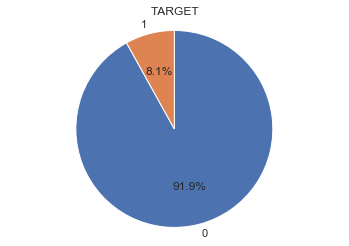

In [10]:
# 円グラフの各項目の名前をリストに入れる
label = [0, 1]

# ラベルごとの件数を取得
target_0 = len(df.query("TARGET==0"))
target_1 = len(df.query("TARGET==1"))

# 各ラベルの値をリストにまとめる
total_count = [target_0, target_1]

plt.title( 'TARGET' )
# 円グラフの描画（上が開始地点になるよう開始を９０度に設定、パーセンテージは小数第一位まで）
plt.pie(total_count, labels=label, counterclock=False, startangle=90, autopct="%.1f%%")
# 座標軸を調整（丸が歪まないようにする）
plt.axis( 'equal' )
plt.show()

TARGET変数の値（0, 1）の比率は、0 = 91.9%、1 = 8.1% であった。  
ほとんどが０に分類される人のデータであり偏りが大きいと言える。  
まとめて分析してしまうと比率の大きい方に結果が引っ張られてしまう可能性があるので、  
それぞれのクラスに分けてどのような特徴の違いがあるか比較した方がパターンが見えやすい  
のではないかと思われる。

## 【問題3】課題設定  
>データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

#### 課題1  
ラベルでデータを分けて特徴量間の相関係数行列を作成し、相関性の高いものを抜き出すと
それぞれのラベルを特徴づけるパターンが見えてくるのではないか。
#### 課題2  
ラベル０とラベル１の同じ特徴量の相関を確認し、相関が低い、あるいは逆相関のデータを  
探し出すことができれば、その特徴量がそれぞれのラベルの特徴を表しているのではないか。
#### 課題3  
ラベル０とラベル１のそれぞれの文字データ（カテゴリーデータ）をグラフで可視化することで、  
各ラベルに特徴的はパターンを導き出すことができるのではないか。

## 【問題4】データ探索  
>問題3で設定した課題・疑問を解決するためにデータ探索を進めます。
>探索で使用する表やグラフを、考察と共に **15個以上** 作成してください。  
>
>探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。



### 課題１の検討  
#### 課題1  
ラベルでデータを分けて特徴量間の相関係数行列を作成し、相関性の高いものを抜き出すと
それぞれのラベルを特徴づけるパターンが見えてくるのではないか。

In [11]:
"""
欠損値対応
"""
# .dropnaを使用して1300つ以上欠損値がある列を削除する
nan_n = len(df) - 1300
df_drop = df.dropna(thresh=nan_n, axis=1)
# 欠損地を含む行を削除する
df_drop = df_drop.dropna(how="any")

# 最大表示列数を10に設定
pd.set_option('display.max_columns', 10)


ラベルごとに分けて考えたいので、まず、データフレームをターゲットごとに分割する。

In [12]:
df_0 = df_drop.query("TARGET==0")
display(df_0)

df_1 = df_drop.query("TARGET==1")
display(df_1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
1,100003,0,Cash loans,F,N,...,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,...,0,0,0,0,0
3,100006,0,Cash loans,F,N,...,0,0,0,0,0
4,100007,0,Cash loans,M,N,...,0,0,0,0,0
5,100008,0,Cash loans,M,N,...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,...,0,0,0,0,0
307506,456251,0,Cash loans,M,N,...,0,0,0,0,0
307507,456252,0,Cash loans,F,N,...,0,0,0,0,0
307508,456253,0,Cash loans,F,N,...,0,0,0,0,0


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,...,0,0,0,0,0
26,100031,1,Cash loans,F,N,...,0,0,0,0,0
40,100047,1,Cash loans,M,N,...,0,0,0,0,0
42,100049,1,Cash loans,F,N,...,0,0,0,0,0
81,100096,1,Cash loans,F,N,...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,...,0,0,0,0,0
307475,456215,1,Cash loans,F,N,...,0,0,0,0,0
307481,456225,1,Cash loans,M,N,...,0,0,0,0,0
307489,456233,1,Cash loans,F,N,...,0,0,0,0,0


各特徴量同士の相関関係を見たいので、ラベル０およびラベル１の相関係数行列を作成し、ヒートマップを作成する。  

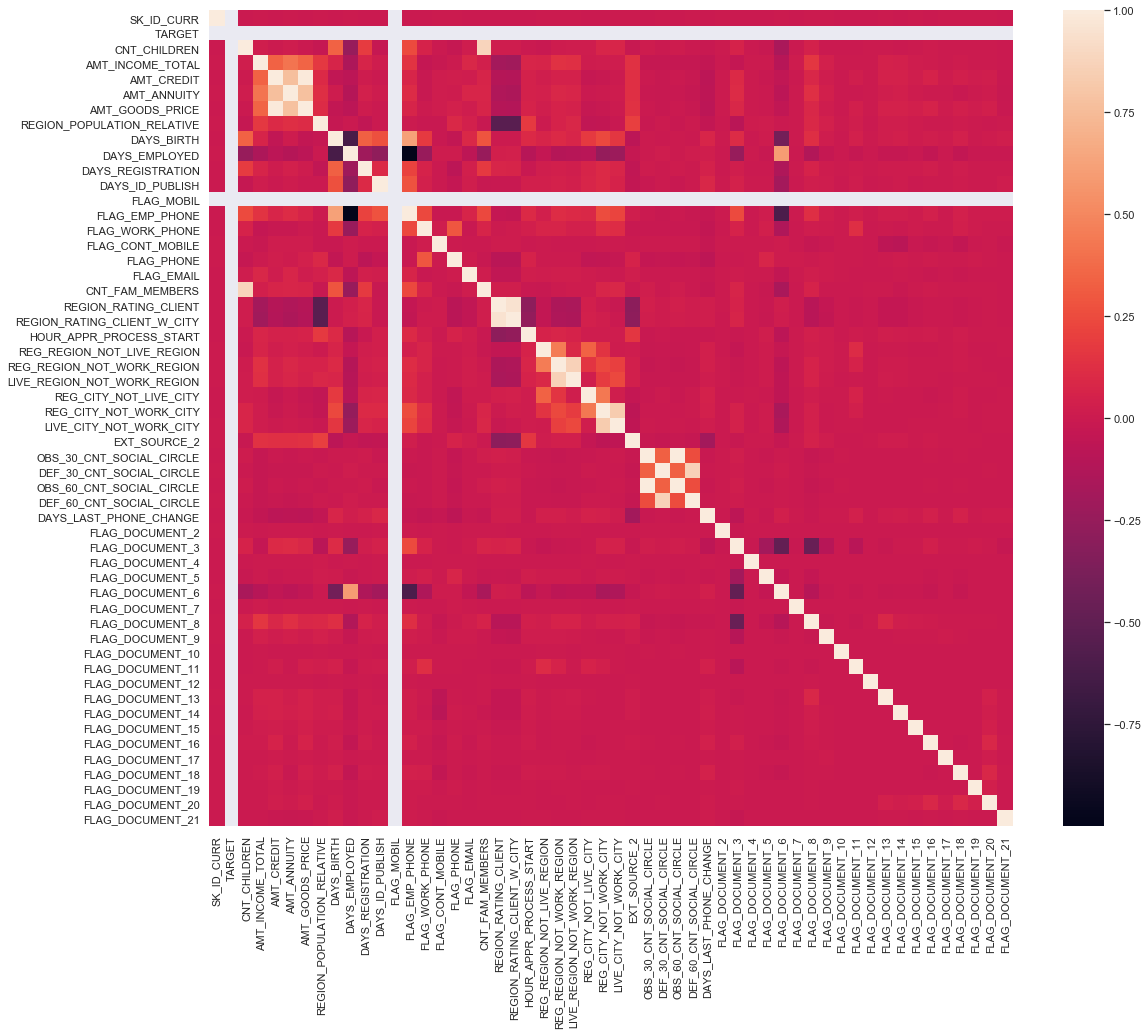

In [13]:
"""
ラベル０（返済可能なグループ）の相関係数行列を作成し、ヒートマップにする。
"""
# .corrメソッドを利用して各特徴量間の相関係数行列を作成
df_0_corr_matrix = df_0.corr()

# seabornを使用してヒートマップを作成
plt.figure(figsize=(18, 15))#15, 10
sns.heatmap(df_0_corr_matrix)

目視で確認した限りでは、以下の組み合わせの相関係数が高いように思われる。

「'AMT_CREDIT' と'AMT_GOODS_PRICE'」  
「'AMT_CREDIT' と'AMT_ANNUITY'」  
「'AMT_ANNUITY' と'AMT_GOODS_PRICE'」  
「'CNT_CHILDREN' と'CNT_FAM_MEMBERS'」  
「'DAYS_EMPLOYED' と'FLAG_DOCUMENT_6'」  
「'REGION_RATING_CLIENT' と'REGION_RATING_CLIENT_W_CITY'」  
「'DEF_30_CNT_SOCIAL_CIRCLE' と'DEF_60_CNT_SOCIAL_CIRCLE'」  

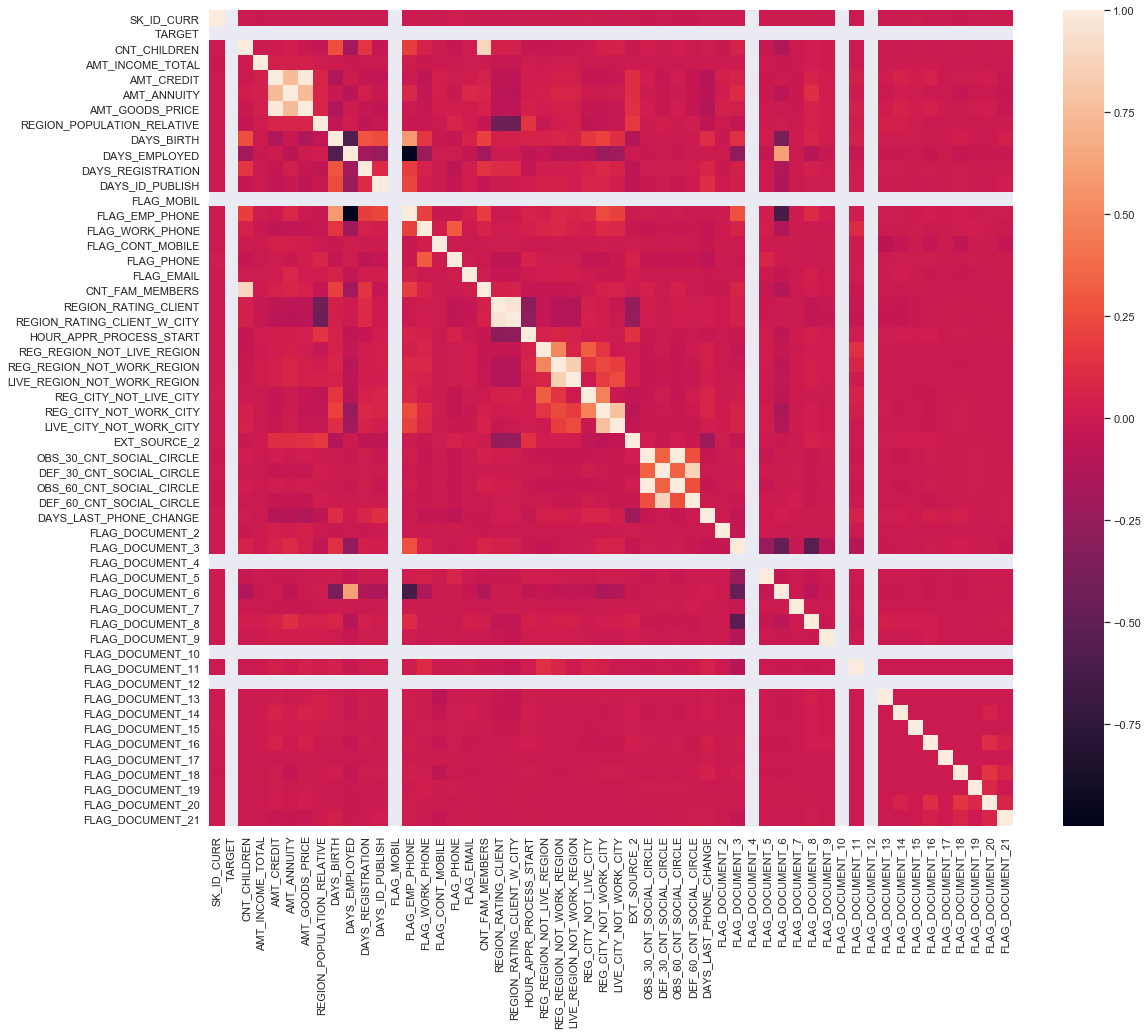

In [14]:
"""
ラベル1（返済できないグループ）の相関係数行列を作成し、ヒートマップにする。
"""
# .corrメソッドを利用して各特徴量間の相関係数行列を作成
df_1_corr_matrix = df_1.corr()

# seabornを使用してヒートマップを作成
plt.figure(figsize=(18, 15))#15, 10
sns.heatmap(df_1_corr_matrix)

目視で確認した限りでは、上記のラベル１の相関係数とあまり変わらないようである。

より厳密に比較するため、pandasのメソッドを用いて、ラベルごとに相関係数の高い組み合わせの上位10位までを出力する。

In [15]:
# 相関関数を比較しやすくするため、ラベル０の相関係数行列を一列に変換する

# サンプル数-欠損値の正常値を残す。df_０_corr_matrix.isnull().sum()の結果、
# 最低値が２であったため、　欠損が２より多い特徴量を削除　。
thresh_n = len(df_0_corr_matrix) - 2
df_0_corr_matrix= df_0_corr_matrix.dropna(thresh=thresh_n, axis=1)
df_0_corr_matrix= df_0_corr_matrix.dropna(thresh=thresh_n, axis=0)

column_list0 = df_0.columns

# 新しい相関係数用の配列を用意
corr_list_0 = []
for i in range(len(df_0_corr_matrix)):
    for j in range(len(df_0_corr_matrix)):
        if i <j:
            a=column_list0[i]
            b=column_list0[j]
            c=df_0_corr_matrix.iloc[i,j]
            corr_list_0.append([a,b,c])

In [16]:
# 相関関数を比較しやすくするため、ラベル１の相関係数行列を一列に変換する

# サンプル数-欠損値の正常値を残す。df_1_corr_matrix.isnull().sum()の結果、
# 最低値が５であったため、　欠損が５より多い特徴量を削除　。
thresh_n = len(df_1_corr_matrix) - 5 
df_1_corr_matrix= df_1_corr_matrix.dropna(thresh=thresh_n, axis=1)
df_1_corr_matrix= df_1_corr_matrix.dropna(thresh=thresh_n, axis=0)

column_list1 = df_1.columns

# 新しい相関係数用の配列を用意
corr_list_1 = []
for i in range(len(df_1_corr_matrix)):
    for j in range(len(df_1_corr_matrix)):
        if i <j:
            a=column_list1[i]
            b=column_list1[j]
            c=df_1_corr_matrix.iloc[i,j]
            corr_list_1.append([a,b,c])

In [17]:
# ラベルごとに相関係数が高い組み合わせを出力

pd.set_option('display.max_rows', None)

df0 = pd.DataFrame(corr_list_0)
df0 =df0.sort_values(by=df0.columns[2], ascending=False)
display(df0.head(10))


df1 = pd.DataFrame(corr_list_1)
df1 = df1.sort_values(by=df1.columns[2], ascending=False)
display(df1.head(10))

,0,1,2
1027,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,0.998513
151,CODE_GENDER,FLAG_OWN_REALTY,0.987260
731,DAYS_BIRTH,DAYS_EMPLOYED,0.949905
65,TARGET,REGION_POPULATION_RELATIVE,0.878681
861,FLAG_MOBIL,FLAG_EMP_PHONE,0.861303
1051,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,0.859458
948,FLAG_CONT_MOBILE,FLAG_PHONE,0.830488
198,FLAG_OWN_CAR,FLAG_OWN_REALTY,0.775838
150,CODE_GENDER,FLAG_OWN_CAR,0.770379
339,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,0.622090


,0,1,2
946,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,0.998286
142,CODE_GENDER,FLAG_OWN_REALTY,0.983065
680,DAYS_BIRTH,DAYS_EMPLOYED,0.956477
62,TARGET,REGION_POPULATION_RELATIVE,0.885556
967,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,0.869761
798,FLAG_MOBIL,FLAG_EMP_PHONE,0.847260
876,FLAG_CONT_MOBILE,FLAG_PHONE,0.778110
186,FLAG_OWN_CAR,FLAG_OWN_REALTY,0.752206
141,CODE_GENDER,FLAG_OWN_CAR,0.751400
382,AMT_CREDIT,REG_CITY_NOT_LIVE_CITY,0.616957


#### 課題１の結論：  
ラベル０とラベル１それぞれの相関係数TOP１０を出力してみたが、  
ほぼ同じ特徴量が並んでおり、それぞれのラベルの特徴は見えてこなかった。

### 課題２の検討  
#### 課題2  
ラベル０とラベル１の同じ特徴量の相関を確認し、相関が低い、あるいは逆相関のデータを  
探し出すことができれば、その特徴量がそれぞれのラベルの特徴を表しているのではないか。

ラベル０およびラベル１の数値データだけを抜き出し、同じ特徴量の相関性を確認する。

In [18]:
# ラベル０とラベル１とではデータ量に差があり、そのまま相関係数を出すことができないので、
# まず、行数の多いラベル０からランダムに行を抜き出し、ラベル１と行数を合わせる。


# ランダム値を固定する。
np.random.seed(0)

# ラベル０の行をランダムに並べ替える
df_0_s = df_0.sample(frac=1)

# 相関関数用のリスト
corr_list = []
for c0 in range(len(column_list0)):
    # 数値データのみを扱いたいのでstringsは除外する
    a = df_0.loc[1][column_list0[c0]]
    if type(a) == str:
        continue

    # 先頭からラベル０と同じ行数だけ抜き出す
    list0 = df_0_s[:len(df_1)][column_list0[c0]].values.tolist()
    # ラベル０はそのまま
    list1 = df_1[column_list0[c0]].values.tolist()
    
    # Seriesに変換する
    s0=pd.Series(list0)
    s1=pd.Series(list1)
    
    # s0とs1の相関係数を取得し、リストへいれる
    res=s0.corr(s1)
    corr_list.append([column_list0[c0], res])

# 相関関数のリストをデータフレームに変換し、ソートする。
df_corr_list = pd.DataFrame(corr_list)
df_corr_list = df_corr_list.sort_values(by=df1.columns[1])
display(df_corr_list)      

,0,1
7,REGION_POPULATION_RELATIVE,-0.008361
19,REGION_RATING_CLIENT,-0.006919
50,FLAG_DOCUMENT_18,-0.006348
17,FLAG_EMAIL,-0.006261
20,REGION_RATING_CLIENT_W_CITY,-0.005735
3,AMT_INCOME_TOTAL,-0.005055
30,DEF_30_CNT_SOCIAL_CIRCLE,-0.004902
28,EXT_SOURCE_2,-0.004728
25,REG_CITY_NOT_LIVE_CITY,-0.003370
41,FLAG_DOCUMENT_9,-0.003200


相関性が低い特徴量を５つ取り出してグラフ化してみる。

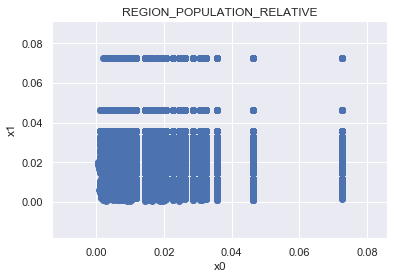

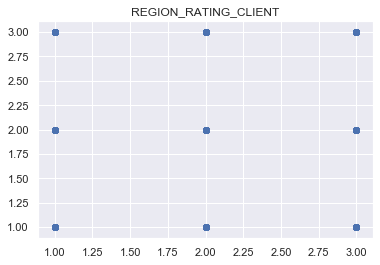

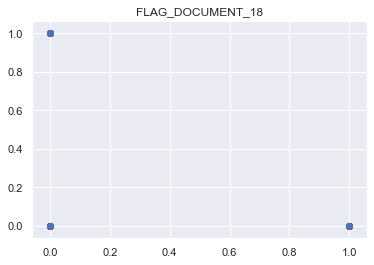

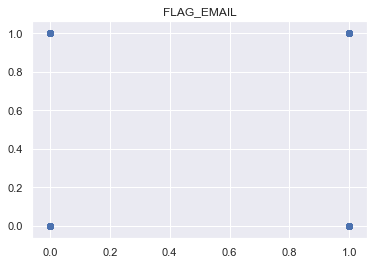

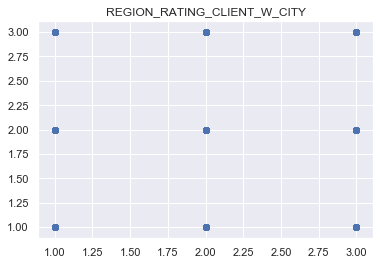

In [19]:
# 散布図で可視化する
#%matplotlib inline
plt.xlabel("x0")
plt.ylabel("x1")

feat = 'REGION_POPULATION_RELATIVE'
plt.title(feat)
plt.scatter(df_0_s[:len(df_1)][feat], df_1[feat])
plt.show()

feat = 'REGION_RATING_CLIENT'
plt.title(feat)
plt.scatter(df_0_s[:len(df_1)][feat], df_1[feat])
plt.show()

feat = 'FLAG_DOCUMENT_18'
plt.title(feat)
plt.scatter(df_0_s[:len(df_1)][feat], df_1[feat])
plt.show()

feat = 'FLAG_EMAIL'
plt.title(feat)
plt.scatter(df_0_s[:len(df_1)][feat], df_1[feat])
plt.show()

feat = 'REGION_RATING_CLIENT_W_CITY'
plt.title(feat)
plt.scatter(df_0_s[:len(df_1)][feat], df_1[feat])
plt.show()

#### 課題2の結論：  
ラベル０とラベル１の同じ特徴量の相関係数を出力し、相関係数が低い特徴量を  
探してみたが、ラベル０と１を特徴づける項目を見つけることはできなかった。  
また、グラフを作成してみたが、それぞれのラベルを特徴付けるようなパターンは見出せなかった。

課題１と課題２の検討結果から、定量的な数値データの相関性からパターンを割り出すのは難しいのではないかと思われる。
定性的な文字データ（カテゴリーデータ）からパターンを見出すことができないか検討する必要がある。

### 課題３の検討  
#### 課題3  
ラベル０とラベル１のそれぞれの文字データ（カテゴリーデータ）をグラフで可視化することで、  
各ラベルに特徴的はパターンを導き出すことができるのではないか。

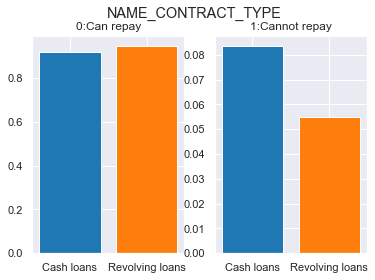

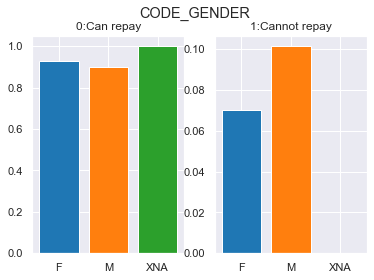

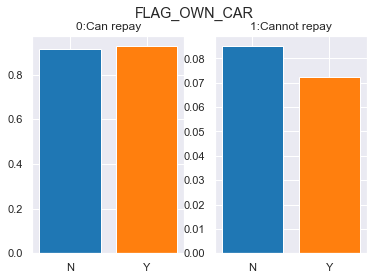

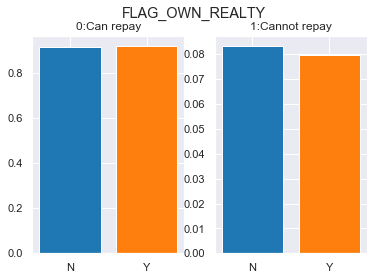

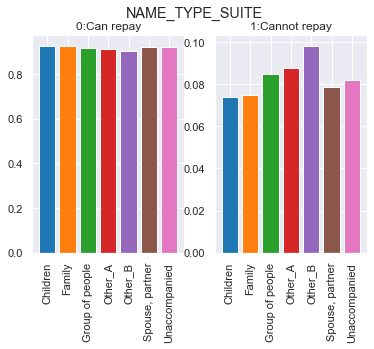

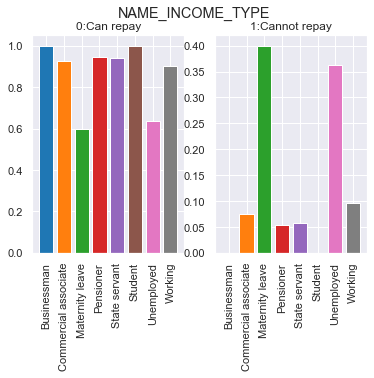

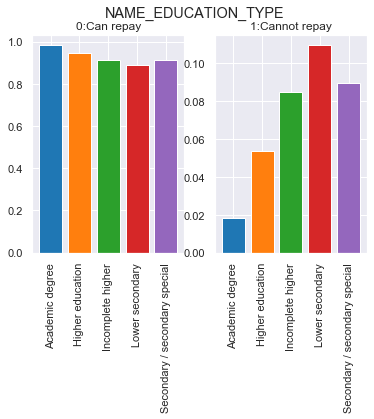

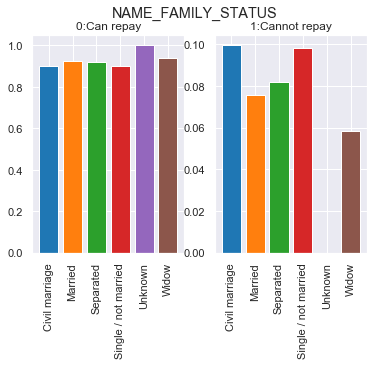

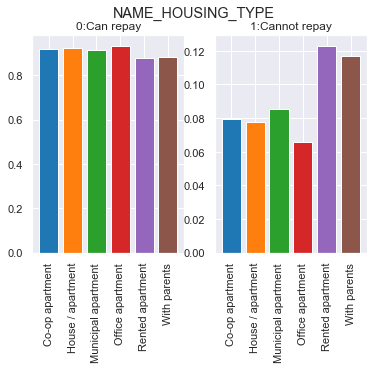

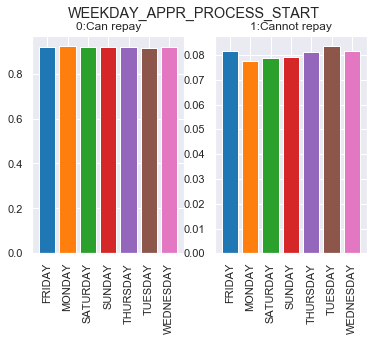

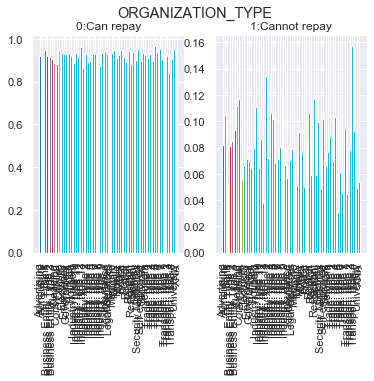

In [20]:
#(Reference)https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda


def str_label_graph(feature):
    """
    string型のデータをもつ特徴量を引数として渡すと、
    その特徴量に含まれるユニークなそれぞれの要素について
    ラベルごとの割り合いをグラフ化する関数
    
    Parameteres
    --------------
    feature: string
        割り合いをグラフ化したい特徴量名
        
    Returns
    --------------
    none
    """
    # 特徴量の各要素の合計数を取得
    temp = df[feature].value_counts()
    df1_temp = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # 大きい順にならぶ(グラフ用)
    # xy_index = pd.DataFrame(temp.index)
    
    # 値で降順で出力されてしまうため、計算用に名前順にする
    df1 = df1_temp.sort_values(feature)
    
    #グラフの軸に使うため、特徴量の要素を保管
    xy_feature = []
    
    # 計算用にnumpyの配列に変換
    xy1_values = []
    for i_df2 in range(len(df1)):
        xy1_values.append(df1.iloc[i_df2,1])
        xy_feature.append(df1.iloc[i_df2,0])
        
    xy1_values_ndarray = np.array(xy1_values)
    
    # ラベル１の要素数を取得（名前順）
    # .groupbyにより、’１’の値を持つデータの合計を取得
    df2 = df[[feature, 'TARGET']].groupby([feature], as_index=False).sum()
    
    # 計算用にnumpyの配列に変換
    xy2_values = []
    for i_df2 in range(len(df2)):
        xy2_values.append(df2.iloc[i_df2,1])
        
    xy2_values_ndarray = np.array(xy2_values)
    

    # ラベル０の要素数を取得（名前順）
    xy3_values_ndarray = xy1_values_ndarray-xy2_values_ndarray
    
    # 各ラベルの比率を計算する
    xy1_ratio = xy2_values_ndarray/xy1_values_ndarray
    xy0_ratio = xy3_values_ndarray/xy1_values_ndarray
    
    # グラフ用に値を入れる
    xy1 = xy0_ratio
    xy2 = xy1_ratio
    # グラフ用に軸名を入れる
    col_xy1 = xy_feature
    col_xy2 = xy_feature

    #グラフ表示
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 2, 1) # 1x2の1つめ(左)
    ax2 = fig.add_subplot(1, 2, 2)   # 1x2の2つめ(右)
    
    ax1.set_title('0:Can repay') 
    ax2.set_title('1:Cannot repay') 

    cmap = plt.get_cmap("tab10") 
    
    for n in range(len(xy1)):
        ax1.bar(col_xy1[n],xy1[n], color=cmap(n))
        ax2.bar(col_xy2[n],xy2[n], color=cmap(n))
    
    fig.suptitle(feature)
    
    # ４つ以上の特徴量がある場合、x軸縦書き（９０度回転）
    if len(xy_feature) > 3:
        ax1.set_xticklabels(col_xy1,rotation=90)
        ax2.set_xticklabels(col_xy2,rotation=90)
    
    plt.show()


# 文字列データの特徴量を取得
string_column_list = []
for col in range(len(column_list0)):
    a = df_0.loc[1][column_list0[col]]
    if type(a) == str:
        string_column_list .append(column_list0[col])
        
# 各特徴量の比率をグラフで表示
for str_lab in string_column_list:
    str_label_graph(str_lab)
    


最後の'ORGANIZATION_TYPE'はデータが多くよく見えないので、再作成。

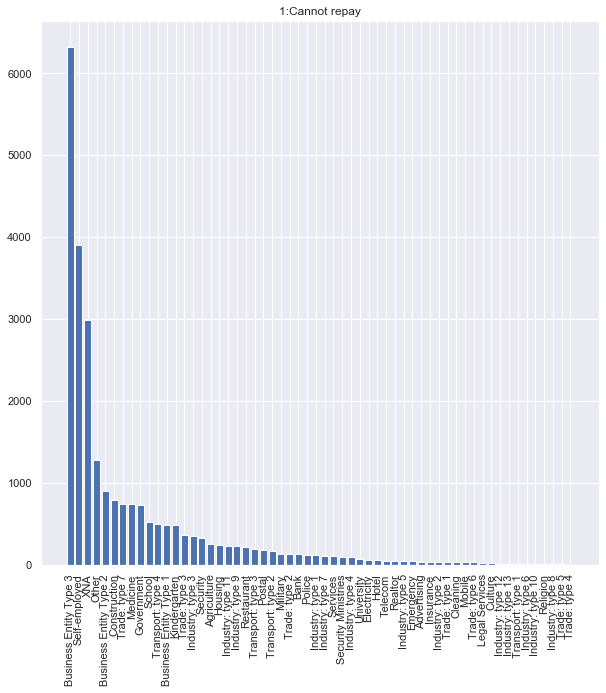

,ORGANIZATION_TYPE,TARGET
5,Business Entity Type 3,6323
42,Self-employed,3908
57,XNA,2990
33,Other,1275
4,Business Entity Type 2,900
7,Construction,785
51,Trade: type 7,740
30,Medicine,737
11,Government,726
39,School,526


In [22]:
df2_large = df[['ORGANIZATION_TYPE', 'TARGET']].groupby(['ORGANIZATION_TYPE'], as_index=False).sum()
df2_large = df2_large.sort_values('TARGET', ascending=False)

plt.title("1:Cannot repay")
plt.xticks(rotation=90)
plt.bar(df2_large['ORGANIZATION_TYPE'],df2_large['TARGET'])
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

display(df2_large)


文字列データの特徴量をラベル分けしてグラフ表示してみたところ、以下のことがわかった。  

- NAME_CONTRACT_TYPE:　返済できない人は、キャッシュローンが多く、リボルビングローンの割合が少ない。  
- CODE_GENDER: 男性の方が返済できない割合が大きい。  
- FLAG_OWN_CAR: 返済できない人は車を持たない人の割合が大きい。  
- FLAG_OWN_REALTY:返済できない人の方が、やや持ち家率が低い。  
- NAME_TYPE_SUITE:　返済できない人は配偶者や子供など家族連れでローンを借りにくる率が低い。  
- NAME_INCOME_TYPE: 返済できない人は、失業中、または産休中であることが多い。  
- NAME_EDUCATION_TYPE:返済できない人は、学歴が中学校卒、高校中退、特別支援教育の率が高い。  
- NAME_FAMILY_STATUS: 返済できない人の方が、独身率が高い。  
- NAME_HOUSING_TYPE:返済できない人の方が、賃貸アパート、または両親と住んでいる率が高い。  
- WEEKDAY_APPR_PROCESS_START: 目立った特徴はない。  
- ORGANIZATION_TYPE:　返済できない人は、親が自営業の率が高い。  

定量的な数値データの相関性による分析では特性は見えてこなかったが、
定性的な文字データを可視化することで、上記の特徴を持つ人は返済できない可能性がある
ことがパターンとして読み取ることができた。  

以上